# X-LoVoCCS Metallicity Relations

In this notebook we relate the global metallicities measured for the X-LoVoCCS galaxy cluster sample to other globally measured quantities. Previous works focused on probing the evolution of ICM metallicity did not find evidence of strong global ICM metallicity evolution with redshift or mass, though there is some evidence of evolution in the core metallicities. LoVoCCS is a local sample, but is statistically complete, so it is still worth looking at how our metallicities relate to other properties.

## Import Statements

In [1]:
from xga.relations.fit import scaling_relation_lira
from xga import DEFAULT_COSMO

from astropy.units import Quantity, def_unit
import pandas as pd
import os

/Users/dt237/code/XGA/xga/utils.py:39: DeprecationWarning: The XGA 'find_all_wcs' function should be imported from imagetools.misc, in the future it will be removed from utils.
  warn(message, DeprecationWarning)
/Users/dt237/code/XGA/xga/utils.py:632: UserWarning: No eSASS installation detected on system, as such all functions in xga.generate.esass will not work.
  warn("No eSASS installation detected on system, as such all functions in xga.generate.esass will not work.")
/opt/anaconda3/envs/xga_dev/lib/python3.8/site-packages/PyAbel-0.8.4-py3.8.egg/abel/tools/circularize.py:4: DeprecationWarning: Please use `map_coordinates` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import map_coordinates
/opt/anaconda3/envs/xga_dev/lib/python3.8/site-packages/PyAbel-0.8.4-py3.8.egg/abel/tools/polar.py:10: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` 

## Creating Storage Directories

We ensure that the storage directory within which we will store the metallicity relations generated in this notebook exists:

In [2]:
if not os.path.exists('../../outputs/scaling_relations/met/'):
    os.makedirs('../../outputs/scaling_relations/met/')
    
stor_pth = '../../outputs/scaling_relations/met/'

## Loading Results

We load the results of the XGA-LTR run that allowed the metallicity to vary freely:

In [3]:
res500_metfree = pd.read_csv('../../outputs/results/ltr_r500_metfree_pipeline_results.csv')
res500_metfree.head(5)

,name,MCXC,LoVoCCSID,LoVoCCS_name,ra,dec,redshift,sub_samp,old_LoVoCCSID,r500,...,Tx500ce+,Lx500ce_0.5-2.0,Lx500ce_0.5-2.0-,Lx500ce_0.5-2.0+,Lx500ce_0.01-100.0,Lx500ce_0.01-100.0-,Lx500ce_0.01-100.0+,Zmet500ce,Zmet500ce-,Zmet500ce+
0,LoVoCCS-0,J1558.3+2713,0,LoVoCCS-0,239.585833,27.226944,0.0894,north,0,1241.126247,...,0.062129,3.859586e+44,2.108788e+43,1.512657e+43,1.443280e+45,7.869493e+43,8.390768e+43,0.209867,0.013384,0.013336
1,LoVoCCS-1,J1510.9+0543,1,LoVoCCS-1,227.729167,5.720000,0.0766,south,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LoVoCCS-2,J0258.9+1334,2,LoVoCCS-2,44.739583,13.579444,0.0739,south,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LoVoCCS-3,J1348.8+2635,3,LoVoCCS-3,207.220833,26.595556,0.0622,north,3,935.622882,...,0.048816,1.894150e+44,6.939636e+41,4.869208e+41,5.772712e+44,3.715156e+42,4.449161e+42,0.128075,0.012191,0.012298
4,LoVoCCS-4,J0041.8-0918,4,LoVoCCS-4,10.458750,-9.301944,0.0555,south,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Setting up for scaling relation fits

We define a custom unit for solar abundance, which allows us to define Astropy quantities with that unit - we also make sure to put a LaTeX format for the unit, as that will be used in scaling relation axis labels:

In [4]:
sol_met = def_unit('AbundSun', format={'latex': r"Z_{\odot}"})

We also set up normalisations for the fits we're going to perform:

In [5]:
met_norm = Quantity(1, sol_met)
tx_norm = Quantity(4, 'keV')
lx52_norm = Quantity(1e+44, 'erg/s')

The names and redshifts of the clusters are read out - we will pass them into the scaling relations so that the data points can easily be coloured by redshift, and we can link particular data points to a particular galaxy cluster more easily:

In [6]:
names = res500_metfree['LoVoCCS_name'].values
zs = res500_metfree['redshift'].values

## Fitting with LIRA

We make use of the LIRA fitting package <font color='red'>(need to make sure to add reference/link)</font> to generate our scaling relations. This is a fitting package for scaling relations that is implemented in R, so we utilise an XGA LIRA interface, which also stores outputs in ScalingRelation product objects, which have some very useful features.

### $Z_{\rm{X},500}$-$T_{\rm{X,500}}$

First, we plot metallicities measured within $R_{500}$ against temperature:

In [7]:
met = Quantity(res500_metfree[['Zmet500', 'Zmet500-', 'Zmet500+']].values, sol_met)
tx = Quantity(res500_metfree[['Tx500', 'Tx500-', 'Tx500+']].values, 'keV')

met_tx_r500 = scaling_relation_lira(met[:, 0], met[:, 1:], tx[:, 0], tx[:, 1:], met_norm, tx_norm, 
                                             y_name=r'$Z_{\rm{X,500}}$', x_name=r'$T_{\rm{X,500}}$', 
                                             dim_hubb_ind=None, point_names=names, third_dim_info=zs, 
                                             third_dim_name='Redshift')
met_tx_r500.author = "Turner et al."
met_tx_r500.model_colour = "tab:cyan"
met_tx_r500.name = r"X-LoVoCCS $R_{500}$"
met_tx_r500.save(stor_pth + "met_tx_r500.xgarel")

/Users/dt237/code/XGA/xga/relations/fit.py:83: UserWarning: 37 sources have NaN values and have been excluded
  warn("{} sources have NaN values and have been excluded".format(thrown_away))
R[write to console]: module mix loaded



  |**************************************************| 100%


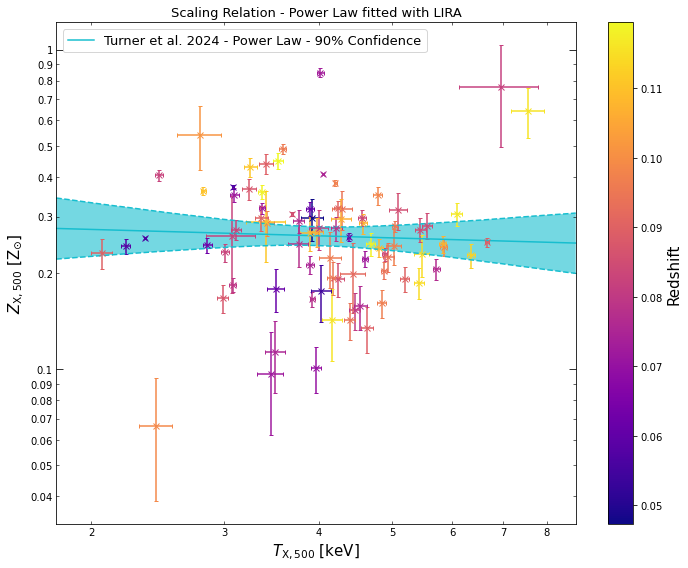

In [8]:
met_tx_r500.view(label_points=False)

Removed no burn in


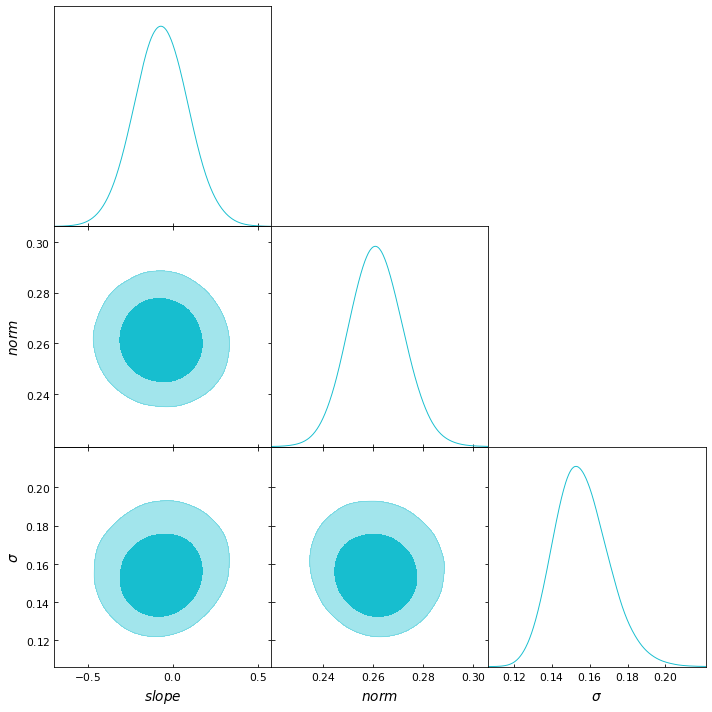

In [9]:
met_tx_r500.view_corner()

### $Z_{\rm{X},500ce}$-$T_{\rm{X,500ce}}$

Then, the core-excised metallicity and temperature:

In [10]:
met = Quantity(res500_metfree[['Zmet500ce', 'Zmet500ce-', 'Zmet500ce+']].values, sol_met)
tx = Quantity(res500_metfree[['Tx500ce', 'Tx500ce-', 'Tx500ce+']].values, 'keV')

met_tx_r500ce = scaling_relation_lira(met[:, 0], met[:, 1:], tx[:, 0], tx[:, 1:], met_norm, tx_norm, 
                                      y_name=r'$Z_{\rm{X,500ce}}$', x_name=r'$T_{\rm{X,500ce}}$', 
                                      dim_hubb_ind=None, point_names=names, third_dim_info=zs, 
                                      third_dim_name='Redshift')
met_tx_r500ce.author = "Turner et al."
met_tx_r500ce.model_colour = "firebrick"
met_tx_r500ce.name = r"X-LoVoCCS $R_{500ce}$"
met_tx_r500ce.save(stor_pth + "met_tx_r500ce.xgarel")

/Users/dt237/code/XGA/xga/relations/fit.py:83: UserWarning: 37 sources have NaN values and have been excluded
  warn("{} sources have NaN values and have been excluded".format(thrown_away))


  |**************************************************| 100%


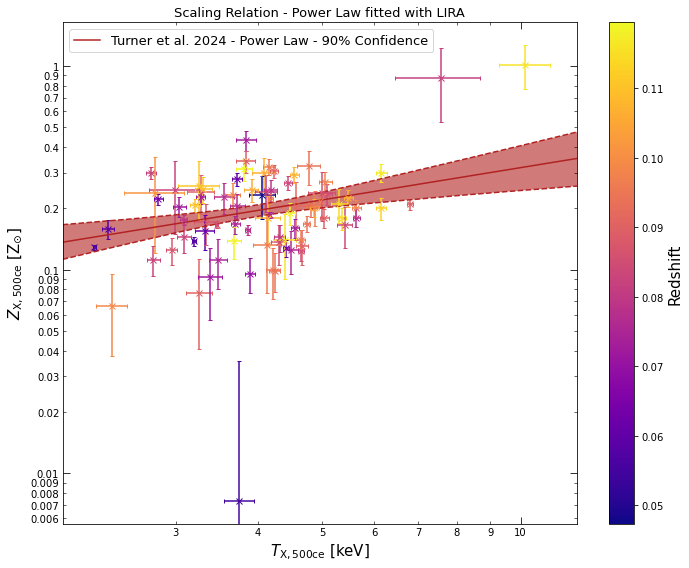

In [11]:
met_tx_r500ce.view()

Removed no burn in


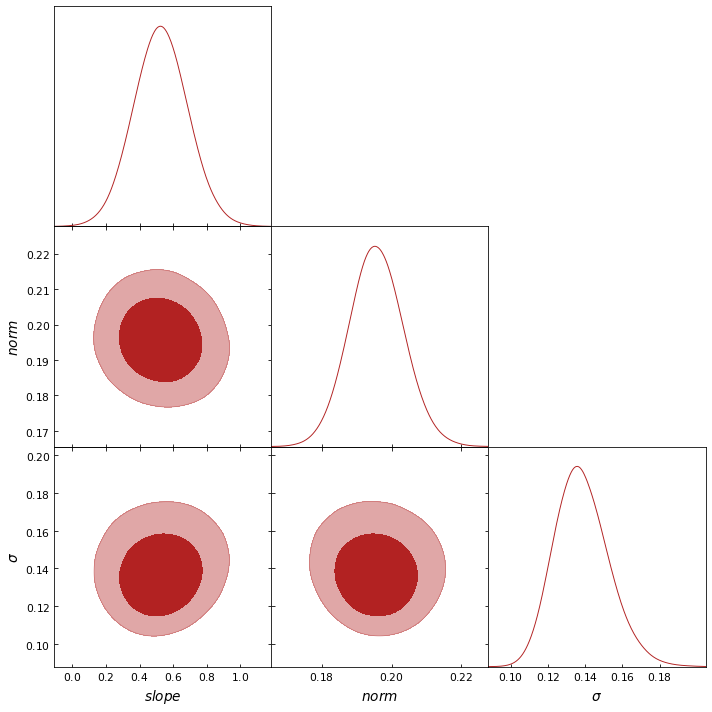

In [12]:
met_tx_r500ce.view_corner()

## Comparing the measured relations

We can easily plot the relations on the same axis, to compare them:

/Users/dt237/code/XGA/xga/products/relation.py:1149: UserWarning: Not all of these ScalingRelations have the same x-axis names.
  return AggregateScalingRelation(to_combine)
/Users/dt237/code/XGA/xga/products/relation.py:1149: UserWarning: Not all of these ScalingRelations have the same y-axis names.
  return AggregateScalingRelation(to_combine)


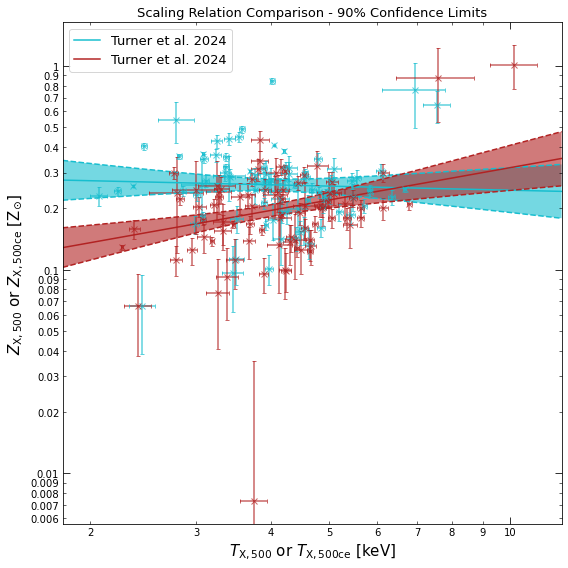

In [13]:
(met_tx_r500+met_tx_r500ce).view()

/Users/dt237/code/XGA/xga/products/relation.py:1149: UserWarning: Not all of these ScalingRelations have the same x-axis names.
  return AggregateScalingRelation(to_combine)
/Users/dt237/code/XGA/xga/products/relation.py:1149: UserWarning: Not all of these ScalingRelations have the same y-axis names.
  return AggregateScalingRelation(to_combine)


Removed no burn in
Removed no burn in


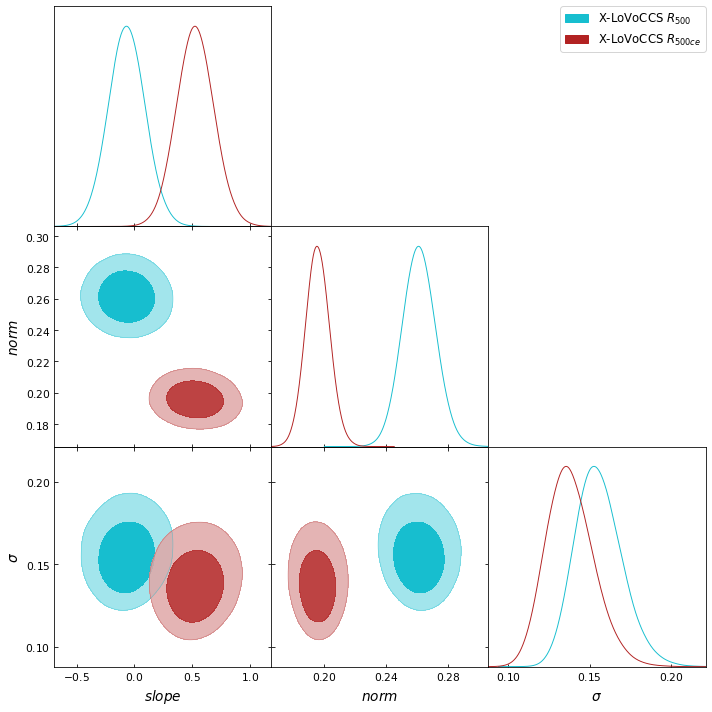

In [14]:
(met_tx_r500+met_tx_r500ce).view_corner()